# CS 109A/STAT 121A/AC 209A 

## Lab 2: Cleaning and EDA of Goodreads 

**Harvard University**<br>
**Fall 2017**<br>
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine**

---

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

Load the appropriate libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [2]:
#Read the data into a dataframe
df = pd.read_csv("data/goodreads.csv")

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
df.head(10)

,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.Suzanne_Collins,2008,/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
0,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
1,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
2,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
3,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
4,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind
5,4.22,7205,0066238501,good_reads:book,https://www.goodreads.com/author/show/1069006....,1949.0,/genres/classics|/genres/young-adult|/genres/c...,dir01/11127.The_Chronicles_of_Narnia.html,286677,The Chronicles of Narnia (Chronicles of Narnia...
6,4.38,10902,0060256656,good_reads:book,https://www.goodreads.com/author/show/435477.S...,1964.0,/genres/childrens|/genres/young-adult|/genres/...,dir01/370493.The_Giving_Tree.html,502891,The Giving Tree
7,3.79,20670,0452284244,good_reads:book,https://www.goodreads.com/author/show/3706.Geo...,1945.0,/genres/classics|/genres/fiction|/genres/scien...,dir01/7613.Animal_Farm.html,1364879,Animal Farm
8,4.18,12302,0345391802,good_reads:book,https://www.goodreads.com/author/show/4.Dougla...,1979.0,/genres/science-fiction|/genres/humor|/genres/...,dir01/11.The_Hitchhiker_s_Guide_to_the_Galaxy....,724713,The Hitchhiker's Guide to the Galaxy (Hitchhik...
9,4.03,20937,0739326228,good_reads:book,https://www.goodreads.com/author/show/614.Arth...,1997.0,/genres/fiction|/genres/historical-fiction|/ge...,dir01/930.Memoirs_of_a_Geisha.html,1042679,Memoirs of a Geisha


Lets read the csv file with custom column descriptions specified in the problem statement.

In [3]:
df=pd.read_csv("data/goodreads.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype',
                      'author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
df.head(10)

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
5,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind
6,4.22,7205,0066238501,good_reads:book,https://www.goodreads.com/author/show/1069006....,1949.0,/genres/classics|/genres/young-adult|/genres/c...,dir01/11127.The_Chronicles_of_Narnia.html,286677,The Chronicles of Narnia (Chronicles of Narnia...
7,4.38,10902,0060256656,good_reads:book,https://www.goodreads.com/author/show/435477.S...,1964.0,/genres/childrens|/genres/young-adult|/genres/...,dir01/370493.The_Giving_Tree.html,502891,The Giving Tree
8,3.79,20670,0452284244,good_reads:book,https://www.goodreads.com/author/show/3706.Geo...,1945.0,/genres/classics|/genres/fiction|/genres/scien...,dir01/7613.Animal_Farm.html,1364879,Animal Farm
9,4.18,12302,0345391802,good_reads:book,https://www.goodreads.com/author/show/4.Dougla...,1979.0,/genres/science-fiction|/genres/humor|/genres/...,dir01/11.The_Hitchhiker_s_Guide_to_the_Galaxy....,724713,The Hitchhiker's Guide to the Galaxy (Hitchhik...


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [4]:
#Start by check the column data types
####### 
#   Insert your code
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [5]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
df.describe()

,rating,year
count,5998.000000,5993.000000
mean,4.042201,1969.085099
std,0.260661,185.383169
min,2.000000,-1500.000000
25%,3.870000,1980.000000
50%,4.050000,2002.000000
75%,4.210000,2009.000000
max,5.000000,2014.000000


Was the data read correctly and values represented as we expected?

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [10]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
print(df.shape)
(df.isnull().sum())

(6000, 10)


rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [19]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [14]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
df.dropna(subset=['rating','isbn','year','genre_urls'],inplace=True)
print(df.shape)
df.isnull().sum()

(5496, 10)


rating          0
review_count    0
isbn            0
booktype        0
author_url      0
year            0
genre_urls      0
dir             0
rating_count    0
name            0
dtype: int64

Ok so we have done some cleaning. Is it enough? 

In [15]:
#Check the column data types again
####### 
#   Insert your code
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [19]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
df[['review_count','year','rating_count']]=df[['review_count','year','rating_count']].astype(int)
print(df.dtypes)
df.head(10)

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
5,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind
6,4.22,7205,0066238501,good_reads:book,https://www.goodreads.com/author/show/1069006....,1949,/genres/classics|/genres/young-adult|/genres/c...,dir01/11127.The_Chronicles_of_Narnia.html,286677,The Chronicles of Narnia (Chronicles of Narnia...
7,4.38,10902,0060256656,good_reads:book,https://www.goodreads.com/author/show/435477.S...,1964,/genres/childrens|/genres/young-adult|/genres/...,dir01/370493.The_Giving_Tree.html,502891,The Giving Tree
8,3.79,20670,0452284244,good_reads:book,https://www.goodreads.com/author/show/3706.Geo...,1945,/genres/classics|/genres/fiction|/genres/scien...,dir01/7613.Animal_Farm.html,1364879,Animal Farm
9,4.18,12302,0345391802,good_reads:book,https://www.goodreads.com/author/show/4.Dougla...,1979,/genres/science-fiction|/genres/humor|/genres/...,dir01/11.The_Hitchhiker_s_Guide_to_the_Galaxy....,724713,The Hitchhiker's Guide to the Galaxy (Hitchhik...


Final check

Some of the other colums that should be strings have NaN. 

In [ ]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.
[5 min]

---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [20]:
#Get the first author_url
test_string = df.author_url[0]
test_string

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [44]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#df['author_name']=df['author_url'].apply(lambda x: x.split('.')[-1])
#df['author_name']=df['author_url'].str.rsplit('.',1).apply(lambda x:x[-1])
#df.author_name.head()

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [47]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
def get_author(url):
    ####### 
    #   Insert your code
    name=url.rsplit('.',1)[-1]
    return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.author[0:5]

0    Suzanne_Collins
1        J_K_Rowling
2    Stephenie_Meyer
3         Harper_Lee
4        Jane_Austen
Name: author, dtype: object

In [66]:
#Examine some examples of genre_urls

#Test out some string operations to isolate the genre name
####### 
#   Insert your code
genre=df.loc[0,'genre_urls']
print(genre)
genre=[x.split('/')[-1] for x in genre.split('|')]
genre=', '.join(genre)
genre

/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action


'young-adult, science-fiction, dystopia, fantasy, science-fiction, romance, adventure, book-club, young-adult, teen, apocalyptic, post-apocalyptic, action'

In [67]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
def split_and_join_genres(url):
    ####### 
    #   Insert your code
    genre=[x.split('/')[-1] for x in url.split('|')]
    genre=', '.join(genre)
    return genre

df['genres']=df.genre_urls.map(split_and_join_genres)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author_name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,Suzanne_Collins,"young-adult, science-fiction, dystopia, fantas..."
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,J_K_Rowling,"fantasy, young-adult, fiction, fantasy, magic,..."
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,Stephenie_Meyer,"young-adult, fantasy, romance, paranormal, vam..."
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,Harper_Lee,"classics, fiction, historical-fiction, academi..."
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,Jane_Austen,"classics, fiction, romance, historical-fiction..."


---

## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

Choose some columns to generate histograms.

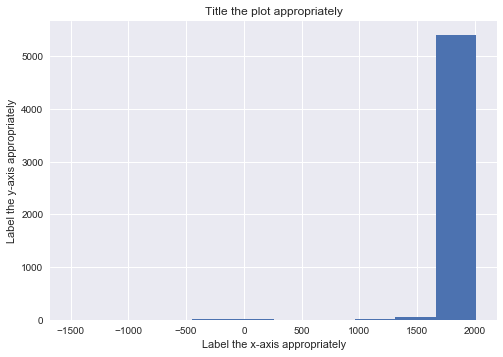

In [80]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)
df.year.hist(bins=10)
plt.xlabel('Label the x-axis appropriately')
plt.ylabel('Label the y-axis appropriately')
plt.title('Title the plot appropriately')

plt.show()

If your histograms appear strange or counter-intuitive, make appropriate adjustments in the data and re-visualize.

In [ ]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

plt.xlabel('Label the x-axis appropriately')
plt.ylabel('Label the y-axis appropriately')
plt.title('Title the plot appropriately')

plt.show()


## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

[5 minutes] 

---

For example, we can determine the "best book" by year! Determine the best books in each year.

In [79]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
for year, subset in df.groupby('year'):
    #Find the best book of the year
    ####### 
    #   Insert your code
    best_book=subset.reset_index().sort_values(by='rating',ascending=False).loc[0,'name']
    print('best book in {} is {}'.format(year,best_book))


best book in -1500 is The Epic of Gilgamesh
best book in -800 is The Odyssey
best book in -560 is Aesop's Fables
best book in -512 is The Art of War
best book in -500 is The Bhagavad Gita
best book in -458 is The Oresteia
best book in -442 is Antigone
best book in -440 is The Histories
best book in -431 is Medea
best book in -429 is Oedipus Rex
best book in -411 is The History of the Peloponnesian War
best book in -400 is The Oedipus Cycle
best book in -390 is Apology
best book in -380 is The Republic
best book in -370 is The Symposium
best book in -360 is Five Dialogues
best book in -350 is The Nicomachean Ethics
best book in -29 is The Aeneid
best book in 4 is The Seven Spiritual Laws of Success
best book in 8 is Metamorphoses
best book in 100 is The New Oxford Annotated Bible, New Revised Standard Version
best book in 121 is The Twelve Caesars
best book in 130 is Holy Bible
best book in 158 is The Golden Ass
best book in 174 is Meditations
best book in 200 is The Garden of Eden
best

best book in 1969 is Slaughterhouse-Five
best book in 1970 is Jonathan Livingston Seagull
best book in 1971 is The Lorax
best book in 1972 is Watership Down
best book in 1973 is J.R.R. Tolkien 4-Book Boxed Set
best book in 1974 is Zen and the Art of Motorcycle Maintenance
best book in 1975 is The Complete Stories and Poems
best book in 1976 is Interview with the Vampire (The Vampire Chronicles, #1)
best book in 1977 is The Shining (The Shining #1)
best book in 1978 is The Stand
best book in 1979 is The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)
best book in 1980 is The Name of the Rose
best book in 1981 is The Unbearable Lightness of Being
best book in 1982 is The Color Purple
best book in 1983 is The Mists of Avalon (Avalon, #1)
best book in 1984 is Neuromancer (Sprawl #1)
best book in 1985 is Ender's Game (The Ender Quintet, #1)
best book in 1986 is Watchmen
best book in 1987 is Beloved
best book in 1988 is The Alchemist
best book in 1989 is The Pillars o

Try this for few other definitions of the "best book" using `.groupby`.

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [ ]:
#Get the unique genres contained in the dataframe.
####### 
#   Insert your code
####### 

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [ ]:
#Add a column for each genre
####### 
#   Insert your code
####### 
df.shape

Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

In [ ]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 

### Part 6.1: What can you conclude from the above visualizations?

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

There is a category called Paranormal Romance!!!!!